In [1]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test, pairwise_logrank_test

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

df = pd.read_pickle('PDL1_GU_DATA.pkl')

df.head()

,id,sex,race,age,tissue,specimen,dx,subtype,primary,date_dx,anti_pdl1,outcome,date_last,pdl1_expression,pdl1_score,origin,primary_merged,fu_months,mortality_overall,mortality_cancer
0,1,Female,Causasian,45,K,rad nephrectomy,CC RCC,Renal cell carcinoma,Kidney,2020-03-24,No,NED,2020-06-04,Positive,10.0,Primary,Kidney,2.365552,AWD + NED,AWD + NED + DOC
1,2,Male,Causasian,65,P,partial penectomy,"Inv SCC, usual",Squamous cell carcinoma,Penis,2019-11-14,Yes,AWD,2020-08-04,Positive,60.0,Primary,NaN,8.673689,AWD + NED,AWD + NED + DOC
2,3,Male,Causasian,43,K,rad nephrectomy,ChrRCC,Renal cell carcinoma,Kidney,2018-03-02,Yes,AWD,2020-09-04,Negative,7.0,Primary,Kidney,30.127929,AWD + NED,AWD + NED + DOC
3,4,Male,African-American,69,K,Bone (L5) excision,Mets CC RCC,Renal cell carcinoma,Kidney,2019-11-04,Yes,AWD,2020-09-16,Positive,40.0,Metastatic,Kidney,10.414998,AWD + NED,AWD + NED + DOC
4,5,Female,African-American,79,K,Needle biopsy,CC RCC,Renal cell carcinoma,Kidney,2020-03-24,No,AWD,2020-05-15,Negative,4.0,Primary,Kidney,1.708454,AWD + NED,AWD + NED + DOC


# Survival curves

In [2]:
df_survival = df.loc[:,['pdl1_expression','primary','fu_months','mortality_overall','mortality_cancer']]
df_survival['mortality_overall'].replace({'AWD + NED':0,'DOD + DOC':1}, inplace=True)
df_survival['mortality_cancer'].replace({'AWD + NED + DOC':0,'DOD':1}, inplace=True)
df_survival

,pdl1_expression,primary,fu_months,mortality_overall,mortality_cancer
0,Positive,Kidney,2.365552,0,0
1,Positive,Penis,8.673689,0,0
2,Negative,Kidney,30.127929,0,0
3,Positive,Kidney,10.414998,0,0
4,Negative,Kidney,1.708454,0,0
...,...,...,...,...,...
76,Positive,Kidney,25.035422,0,0
77,Negative,Kidney,4.895378,0,0
78,Positive,Kidney,0.591388,1,1
79,Positive,Ureter,3.909731,0,0


## PD-L1 expression and overall mortality

### All tumors

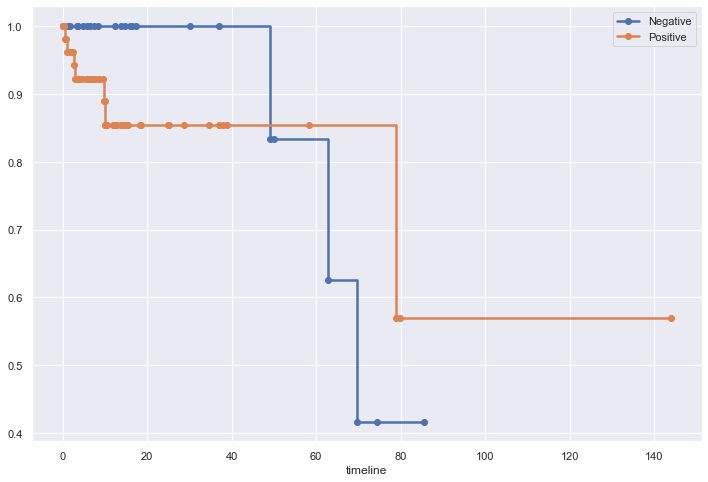

In [3]:
kmf = KaplanMeierFitter()
for name, data in df_survival.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, lw=2.5, marker='o')

In [4]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival['fu_months'], df_survival['pdl1_expression'], df_survival['mortality_overall'])
print(results.p_value)

0.5550694451324474


### Primary: Kidney

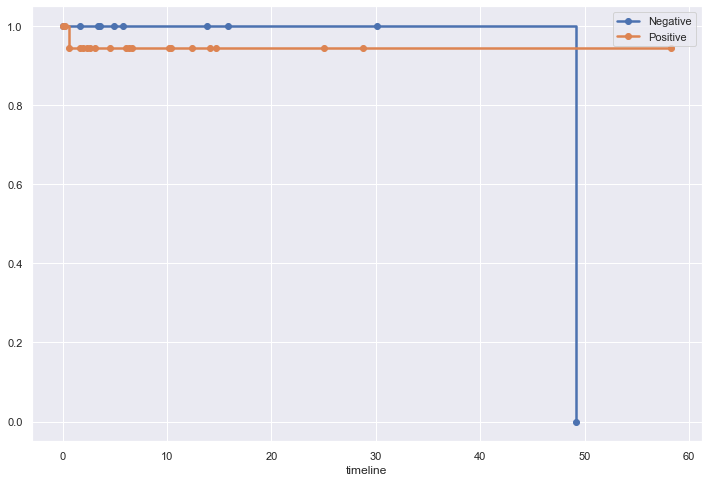

In [5]:
df_survival_kidney = df_survival.query('primary == "Kidney"')
kmf =KaplanMeierFitter()
for name, data in df_survival_kidney.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [6]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_kidney['fu_months'], df_survival_kidney['pdl1_expression'], df_survival_kidney['mortality_overall'])
print(results.p_value)

0.8083651559145104


### Primary: Penis

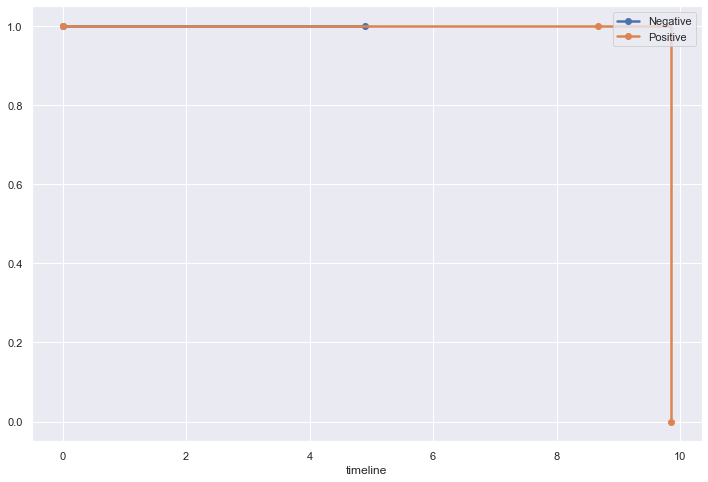

In [7]:
df_survival_penis = df_survival.query('primary == "Penis"')
kmf = KaplanMeierFitter()
for name, data in df_survival_penis.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(linewidth=2.5, marker='o')

In [8]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_penis['fu_months'], df_survival_penis['pdl1_expression'], df_survival_penis['mortality_overall'])
print(results.p_value)

1.0


### Primary: Bladder

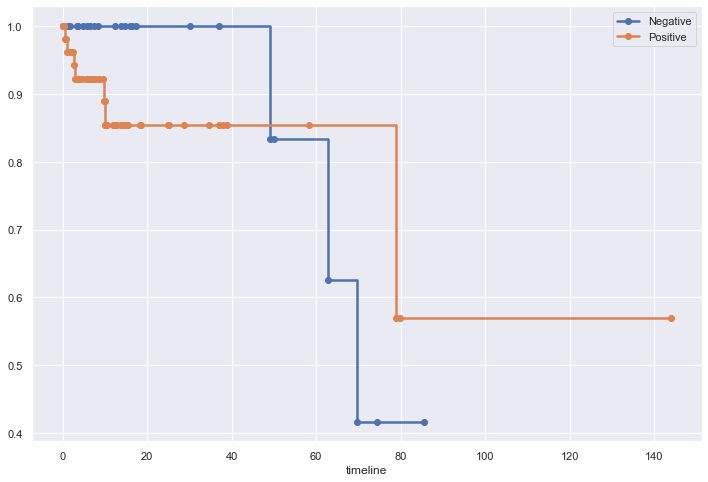

In [9]:
df_survival_bladder = df_survival.query('primary == "Bladder"')
kmf = KaplanMeierFitter()
for name, data in df_survival.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [10]:
# P value (log-rank test)
results =  multivariate_logrank_test(df_survival_bladder['fu_months'], df_survival_bladder['pdl1_expression'], df_survival_bladder['mortality_overall'])
print(results.p_value)

0.6646098893186931


 ### Primary: Urethra

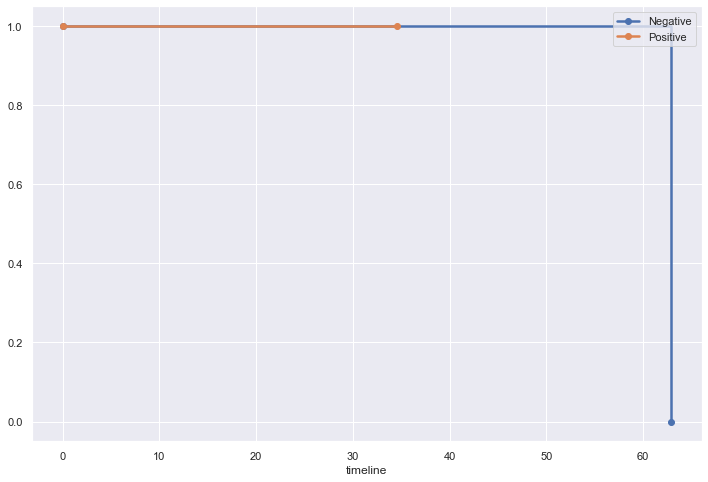

In [11]:
df_survival_tumor = df_survival.query('primary == "Urethra"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [12]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_overall'])
print(results.p_value)

1.0


### Primary: Ureter

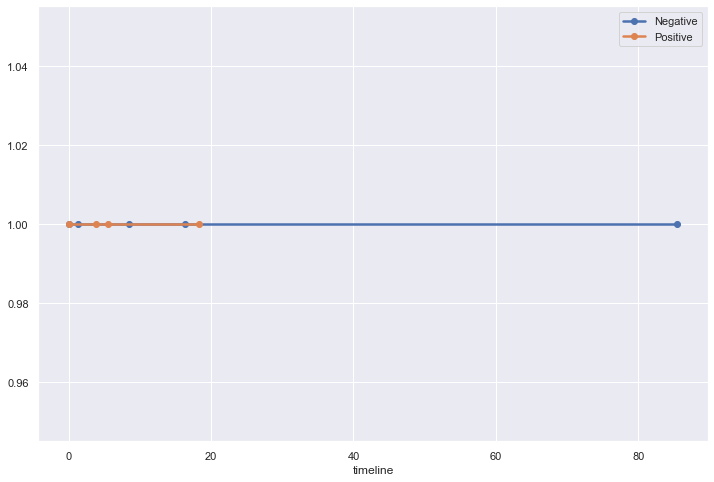

In [13]:
df_survival_tumor = df_survival.query('primary == "Ureter"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [14]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_overall'])
print(results.p_value)

1.0


### Primary: Prostate

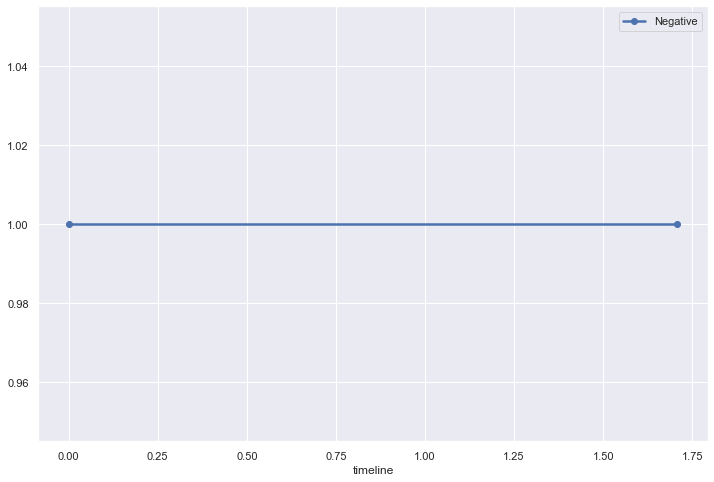

In [15]:
df_survival_tumor = df_survival.query('primary == "Prostate"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [16]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_overall'])
print(results.p_value)

nan


## PD-L1 expression and cancer-related mortality 

### All tumors

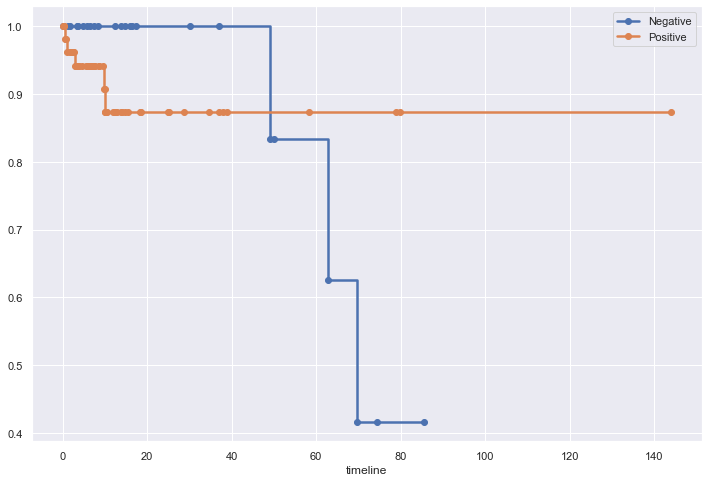

In [17]:
for name, data in df_survival.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [18]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_cancer'])
print(results.p_value)

nan


### Kidney

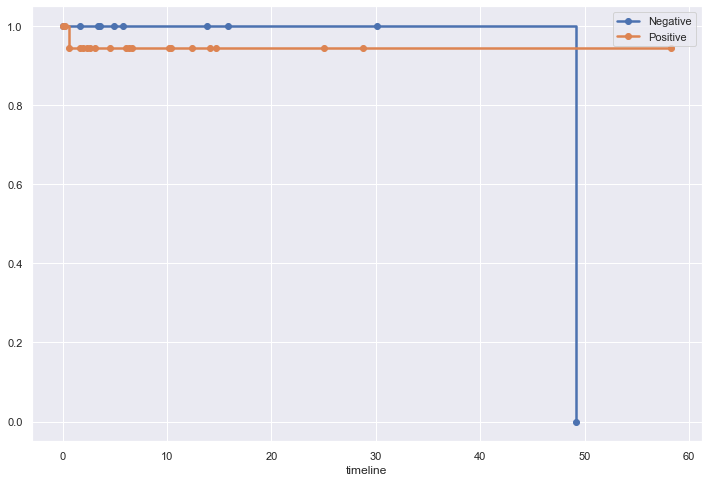

In [19]:
df_survival_tumor = df_survival.query('primary == "Kidney"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [20]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_cancer'])
print(results.p_value)

0.8083651559145104


### Penis

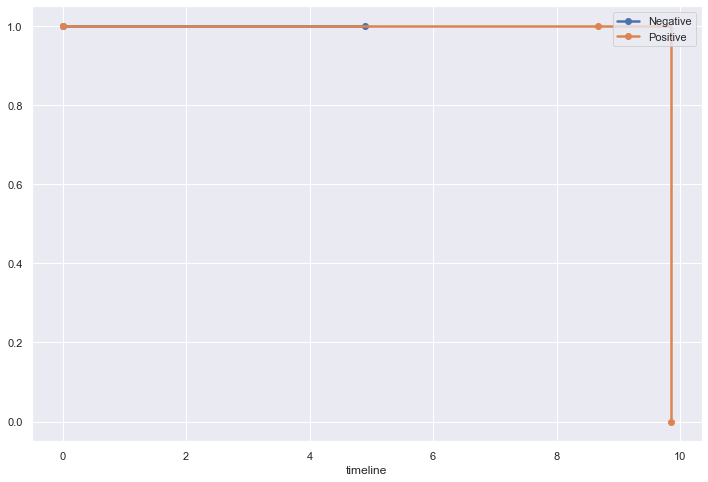

In [21]:
df_survival_tumor = df_survival.query('primary == "Penis"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [22]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_cancer'])
print(results.p_value)

1.0


### Bladder

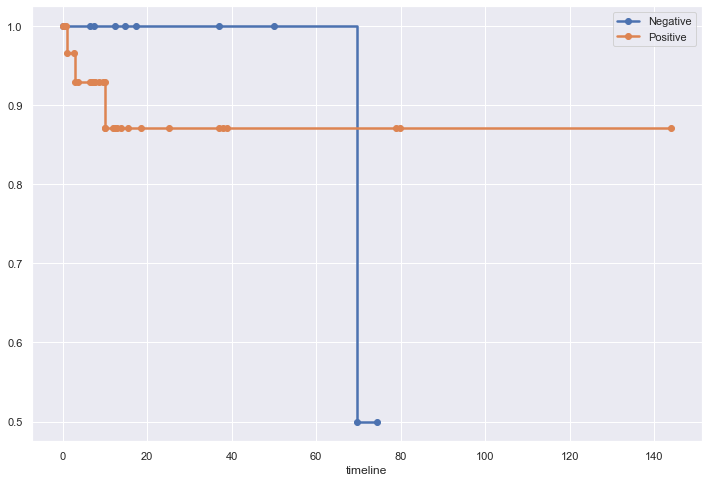

In [23]:
df_survival_tumor = df_survival.query('primary == "Bladder"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [24]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_cancer'])
print(results.p_value)

0.8327795424232842


### Urethra

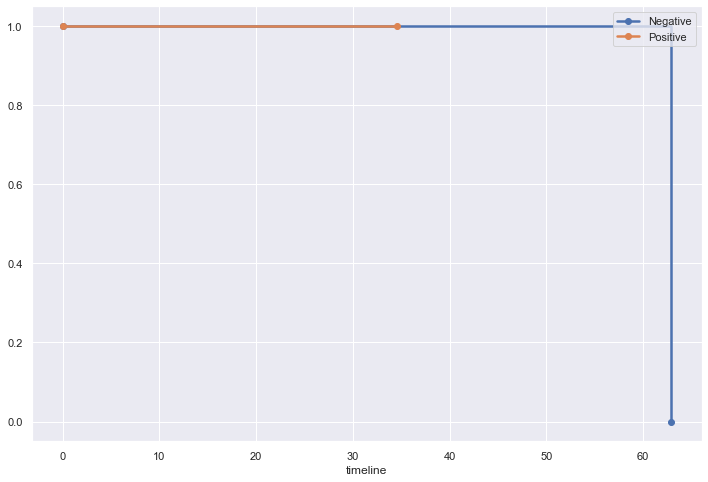

In [25]:
df_survival_tumor = df_survival.query('primary == "Urethra"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [26]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_cancer'])
print(results.p_value)

1.0


### Uterer

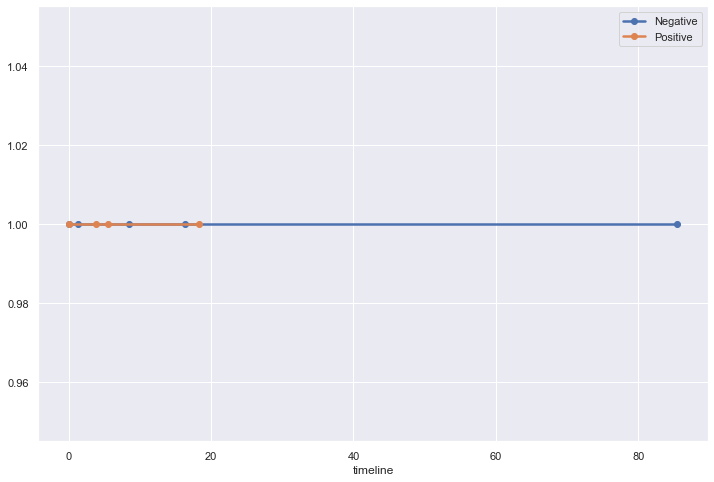

In [27]:
df_survival_tumor = df_survival.query('primary == "Ureter"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [28]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_cancer'])
print(results.p_value)

1.0


### Prostate

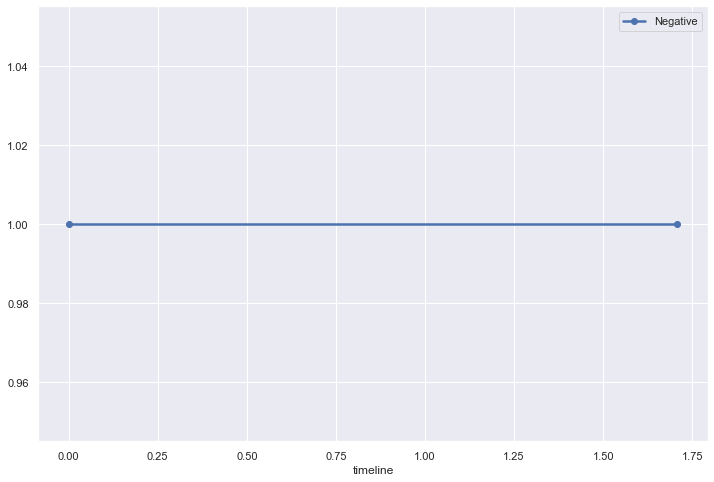

In [29]:
df_survival_tumor = df_survival.query('primary == "Prostate"')
for name, data in df_survival_tumor.groupby('pdl1_expression'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [30]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival_tumor['fu_months'], df_survival_tumor['pdl1_expression'], df_survival_tumor['mortality_cancer'])
print(results.p_value)

nan
